In [12]:
import duckdb
import matplotlib.pyplot as plt

In [13]:
times = duckdb.sql(f"""
    SELECT pickup_datetime, trip_miles, base_passenger_fare, base_passenger_fare / NULLIF(trip_miles, 0) AS fare_per_mile
    FROM "nyc_data.parquet"
""")

print(times)

┌─────────────────────┬────────────┬─────────────────────┬────────────────────┐
│   pickup_datetime   │ trip_miles │ base_passenger_fare │   fare_per_mile    │
│      timestamp      │   double   │       double        │       double       │
├─────────────────────┼────────────┼─────────────────────┼────────────────────┤
│ 2019-02-01 00:05:18 │       2.45 │                9.35 │ 3.8163265306122445 │
│ 2019-02-01 00:41:29 │       1.71 │                7.91 │  4.625730994152047 │
│ 2019-02-01 00:51:34 │       5.01 │               44.96 │  8.974051896207586 │
│ 2019-02-01 00:03:51 │       0.34 │                7.19 │ 21.147058823529413 │
│ 2019-02-01 00:09:44 │       6.84 │               24.25 │ 3.5453216374269005 │
│ 2019-02-01 00:59:55 │       1.11 │                5.75 │   5.18018018018018 │
│ 2019-02-01 00:12:06 │       4.53 │               16.39 │  3.618101545253863 │
│ 2019-02-01 00:45:35 │      11.24 │               29.77 │  2.648576512455516 │
│ 2019-02-01 00:10:48 │       1.59 │    

In [14]:
average = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

In [15]:
percentiles_50 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.5) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [16]:
percentiles_25 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.25) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [17]:
percentiles_75 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.75) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [18]:
percentiles_90 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.9) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [ ]:
avg_df = average.df()
percentiles_50_df = percentiles_50.df()
percentiles_25_df = percentiles_25.df()
percentiles_75_df = percentiles_75.df()
percentiles_90_df = percentiles_90.df()

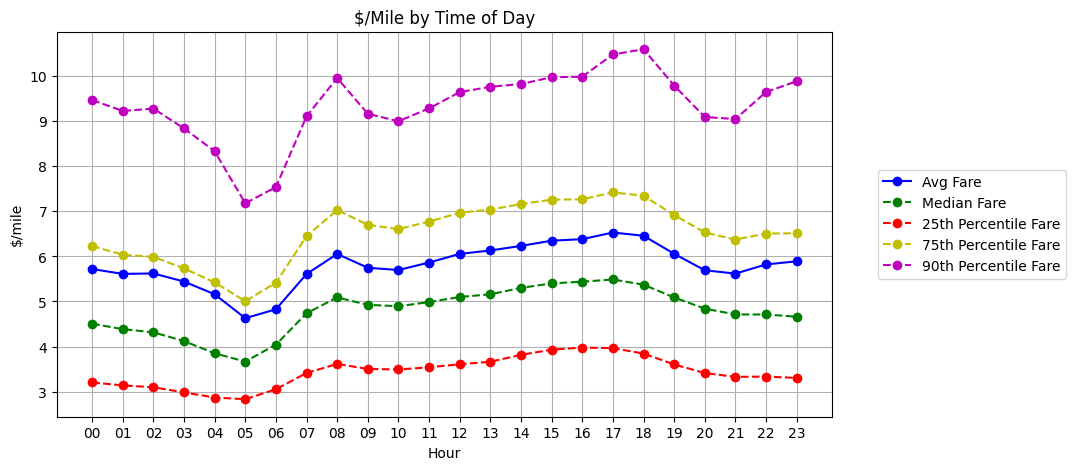

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(avg_df["hour"], avg_df["avg_fare_per_mile"], marker="o", linestyle="-", color="b", label="Avg Fare")
plt.plot(percentiles_50_df["hour"], percentiles_50_df["median_fare_per_mile"], marker="o", linestyle="--", color="g", label="Median Fare")
plt.plot(percentiles_25_df["hour"], percentiles_25_df["median_fare_per_mile"], marker="o", linestyle="--", color="r", label="25th Percentile Fare")
plt.plot(percentiles_75_df["hour"], percentiles_75_df["median_fare_per_mile"], marker="o", linestyle="--", color="y", label="75th Percentile Fare")
plt.plot(percentiles_90_df["hour"], percentiles_90_df["median_fare_per_mile"], marker="o", linestyle="--", color="m", label="90th Percentile Fare")

plt.xlabel("Hour")
plt.ylabel("$/mile")
plt.title("$/Mile by Time of Day")
plt.xticks(range(0, 24)) 
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()